In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

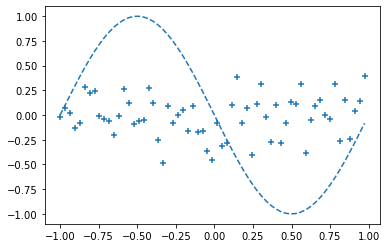

Epoch:0/2001, Error:0.2743818562896866


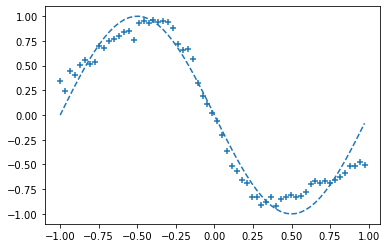

Epoch:200/2001, Error:0.01005330786984756


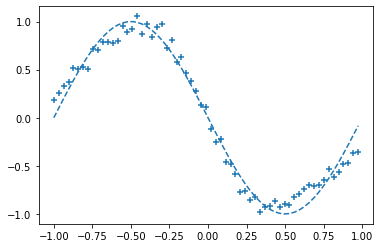

Epoch:400/2001, Error:0.005933594587283103


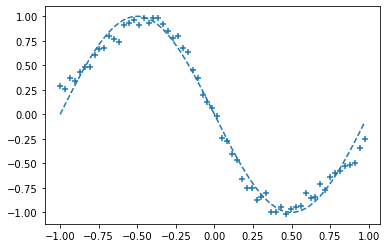

Epoch:600/2001, Error:0.004415683651820781


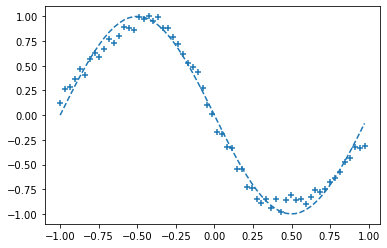

Epoch:800/2001, Error:0.003828421569049271


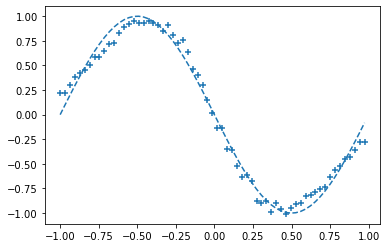

Epoch:1000/2001, Error:0.0036600222928696675


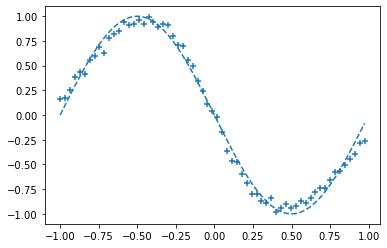

Epoch:1200/2001, Error:0.002696693674739525


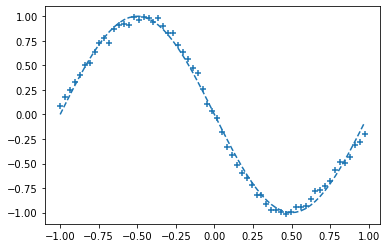

Epoch:1400/2001, Error:0.0013240345526523254


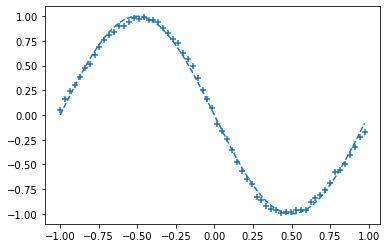

Epoch:1600/2001, Error:0.0006295206436561377


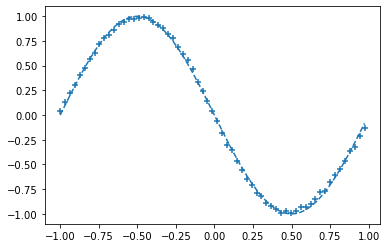

Epoch:1800/2001, Error:0.0002751741578567669


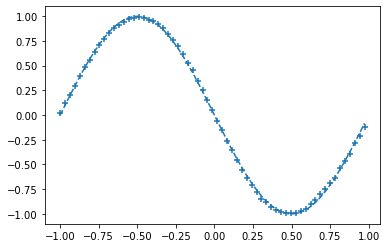

Epoch:2000/2001, Error:0.00012458309425804828


In [7]:
#sin 함수에 대한 학습 신경망
#회귀 문제이므로 출력층의 활성화 함수는 항등함수, 손실 함수는 오차제곱합
#최적화 알고리즘은 가장 단순한 확률적 경사하강법
#배치 사이즈는 온라인 학습(1)

#입력과 정답 준비
input_data = np.arange(0, np.pi*2, 0.1) #입력
correct_data = np.sin(input_data) #정답
input_data = (input_data - np.pi) / np.pi #입력을 -1.0 ~ 1.0 범위로 조정
n_data = len(correct_data) #데이터 수

#각 설정 값
n_in = 1 #입력층 뉴런 수
n_mid = 3 #은닉층 뉴런 수
n_out = 1 #출력층 뉴런 수

wb_width = 0.01 #가중치와 편향 설정을 위한 정규분포의 표준편차
eta = 0.1 #학습률
epoch = 2001
interval = 200

class OutputLayer:
    """
    출력층
    활성화 함수 - 항등함수
    """
    #앞 층의 뉴런 개수, 현재 층의 뉴런 개수
    def __init__(self, n_upper, n):
        #randn -> 평균 0, 표준편차 1인 가우시안 표준정규분포 난수를 행렬로 생성
        #wb_width 정규분포의 표준편차
        #가중치(행렬)
        self.w = wb_width * np.random.randn(n_upper, n)
        #편향(벡터)
        self.b = wb_width * np.random.randn(n)
        
    #순전파
    #x는 입력값
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = u #활성화 함수 - 항등함수
        
    #역전파
    #t는 예측의 정답
    def backward(self, t):
        #예측 결과와 정답 간의 차이
        delta = self.y - t
        
        #가중치 기울기
        self.grad_w = np.dot(self.x.T, delta)
        #편향 기울기
        self.grad_b = np.sum(delta, axis=0)
        
        #입력값 기울기
        self.grad_x = np.dot(delta, self.w.T)
        
    #가중치와 편향 수정
    #eta - 학습률(learning rate)
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b
        
class MiddleLayer:
    """
    은닉층
    활성화 함수 - 시그모이드
    """
    #앞 층의 뉴런 개수, 현재 층의 뉴런 개수
    def __init__(self, n_upper, n):
        #randn -> 평균 0, 표준편차 1인 가우시안 표준정규분포 난수를 행렬로 생성
        #wb_width 정규분포의 표준편차
        #가중치(행렬)
        self.w = wb_width * np.random.randn(n_upper, n)
        #편향(벡터)
        self.b = wb_width * np.random.randn(n)
        
    #순전파
    #x는 입력값
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = 1 / (1 + np.exp(-u)) #활성화 함수 - 시그모이드
        
    #역전파
    #grad_y는 뒤 계층에서 역전파 되어 오는 입력 기울기 값
    def backward(self, grad_y):
        delta = grad_y * (1 - self.y) * self.y #시그모이드 함수 미분
        
        #가중치 기울기
        self.grad_w = np.dot(self.x.T, delta)
        #편향 기울기
        self.grad_b = np.sum(delta, axis=0)
        
        #입력값 기울기
        self.grad_x = np.dot(delta, self.w.T)
        
    #가중치와 편향 수정
    #eta - 학습률(learning rate)
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b
        
#각 층의 초기화
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

#학습
for i in range(epoch):
    #인덱스 임의 섞기
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    #결과 표시
    total_error = 0
    plot_x = []
    plot_y = []
    
    for idx in index_random:
        x = input_data[idx:idx+1] #입력
        t = correct_data[idx:idx+1] #정답
        
        #순전파
        middle_layer.forward(x.reshape(1, 1))#행렬로 연산해야 하므로 입력을 행렬로 변환
        output_layer.forward(middle_layer.y) #은닉층의 결과 값을 입력으로
        
        #역전파
        output_layer.backward(t.reshape(1, 1))
        middle_layer.backward(output_layer.grad_x) #뒷 레이어의 입력 기울기를 입력으로
        
        #가중치와 편향 수정
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i % interval == 0:
            y = output_layer.y.reshape(-1) #행렬을 벡터로 되돌림
            
            #오차제곱합 계산
            total_error += 1.0 / 2.0 * np.sum(np.square(y - t))
            
            #출력 기록
            plot_x.append(x)
            plot_y.append(y)
    
    if i % interval == 0:
        #출력 그래프 표시(x, y)
        plt.plot(input_data, correct_data, linestyle="dashed")
        plt.scatter(plot_x, plot_y, marker="+")
        plt.show()
        
        #에포크 수와 요차 표시
        print(f"Epoch:{i}/{epoch}, Error:{total_error/n_data}")
        
        

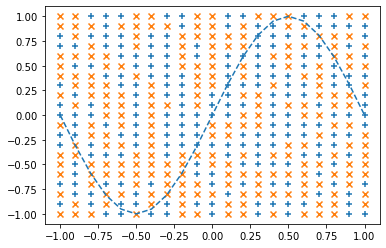

Epoch:0/101, Error:0.7247841135305675


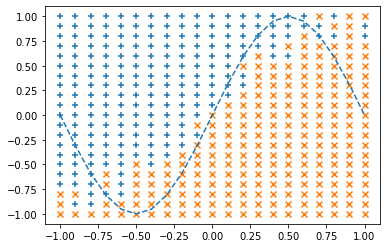

Epoch:10/101, Error:0.3160720811460848


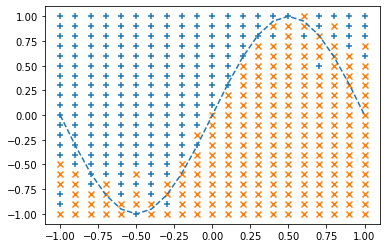

Epoch:20/101, Error:0.22452405287167082


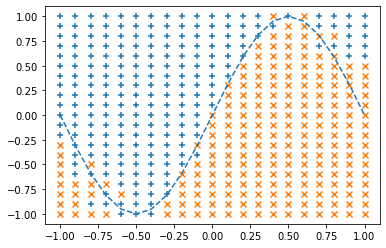

Epoch:30/101, Error:0.1775112760249819


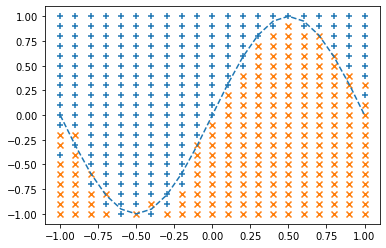

Epoch:40/101, Error:0.1428636162187465


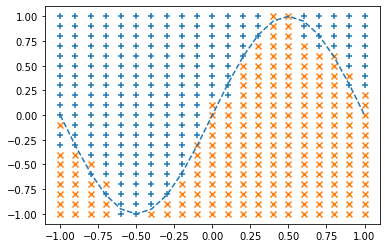

Epoch:50/101, Error:0.11525730002570335


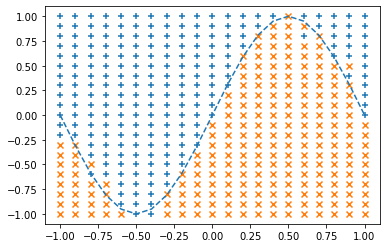

Epoch:60/101, Error:0.08963804848983421


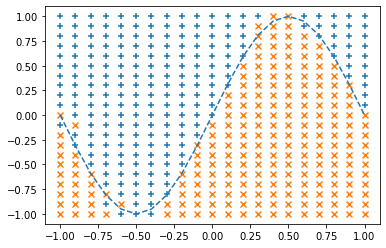

Epoch:70/101, Error:0.07921004401770816


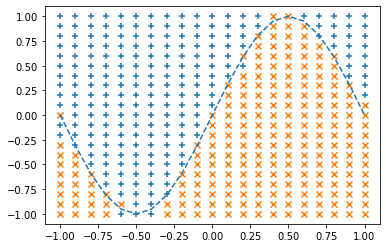

Epoch:80/101, Error:0.08107446954960422


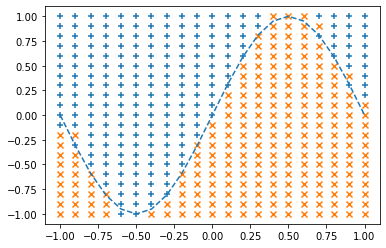

Epoch:90/101, Error:0.07653651007673208


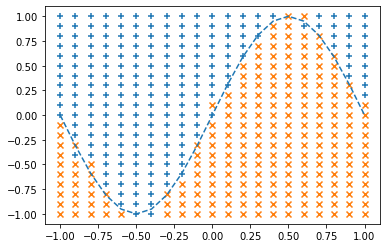

Epoch:100/101, Error:0.0735612911562681


In [8]:
#주어진 좌표 x,y가 sin 함수의 위 / 아래에 존재하는지 분류하는 신경망
#분류 문제이므로 출력층의 활성화 함수는 소프트맥스, 손실 함수는 교차 엔트로피 오차
#최적화 알고리즘은 가장 단순한 확률적 경사하강법
#배치 사이즈는 온라인 학습(1)

#x, y 값
X = np.arange(-1.0, 1.1, 0.1)
Y = np.arange(-1.0, 1.1, 0.1)

#입력과 정답 준비
input_data = [] #입력
correct_data = [] #정답
for x in X:
    for y in Y:
        input_data.append([x, y])
        if y < np.sin(np.pi * x): #y값이 sin곡선 아래에 있다면
            correct_data.append([0, 1])#아래 영역
        else:
            correct_data.append([1, 0])#위 영역

n_data = len(correct_data) #데이터 수
input_data = np.array(input_data)
correct_data = np.array(correct_data)

#각 설정 값
n_in = 2 #입력층 뉴런 수
n_mid = 6 #은닉층 뉴런 수
n_out = 2 #출력층 뉴런 수

wb_width = 0.01 #가중치와 편향 설정을 위한 정규분포의 표준편차
eta = 0.1 #학습률
epoch = 101
interval = 10

class OutputLayer:
    """
    출력층
    활성화 함수 - 항등함수
    """
    #앞 층의 뉴런 개수, 현재 층의 뉴런 개수
    def __init__(self, n_upper, n):
        #randn -> 평균 0, 표준편차 1인 가우시안 표준정규분포 난수를 행렬로 생성
        #wb_width 정규분포의 표준편차
        #가중치(행렬)
        self.w = wb_width * np.random.randn(n_upper, n)
        #편향(벡터)
        self.b = wb_width * np.random.randn(n)
        
    #순전파
    #x는 입력값
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        #활성화 함수 - 소프트맥스
        self.y = np.exp(u) / np.sum(np.exp(u), axis=1, keepdims=True) #keepdims을 통해 브로드캐스트 나눗셈 수행
        
    #역전파
    #t는 예측의 정답
    def backward(self, t):
        #예측 결과와 정답 간의 차이
        delta = self.y - t
        
        #가중치 기울기
        self.grad_w = np.dot(self.x.T, delta)
        #편향 기울기
        self.grad_b = np.sum(delta, axis=0)
        
        #입력값 기울기
        self.grad_x = np.dot(delta, self.w.T)
        
    #가중치와 편향 수정
    #eta - 학습률(learning rate)
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b
        
class MiddleLayer:
    """
    은닉층
    활성화 함수 - 시그모이드
    """
    #앞 층의 뉴런 개수, 현재 층의 뉴런 개수
    def __init__(self, n_upper, n):
        #randn -> 평균 0, 표준편차 1인 가우시안 표준정규분포 난수를 행렬로 생성
        #wb_width 정규분포의 표준편차
        #가중치(행렬)
        self.w = wb_width * np.random.randn(n_upper, n)
        #편향(벡터)
        self.b = wb_width * np.random.randn(n)
        
    #순전파
    #x는 입력값
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = 1 / (1 + np.exp(-u)) #활성화 함수 - 시그모이드
        
    #역전파
    #grad_y는 뒤 계층에서 역전파 되어 오는 입력 기울기 값
    def backward(self, grad_y):
        delta = grad_y * (1 - self.y) * self.y #시그모이드 함수 미분
        
        #가중치 기울기
        self.grad_w = np.dot(self.x.T, delta)
        #편향 기울기
        self.grad_b = np.sum(delta, axis=0)
        
        #입력값 기울기
        self.grad_x = np.dot(delta, self.w.T)
        
    #가중치와 편향 수정
    #eta - 학습률(learning rate)
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b
        
#각 층의 초기화
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

sin_data = np.sin(np.pi * X) #결과 검증용

#학습
for i in range(epoch):
    #인덱스 임의 섞기
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    #결과 표시
    total_error = 0
    x_1 = []
    y_1 = []
    x_2 = []
    y_2 = []
    
    for idx in index_random:
        x = input_data[idx] #입력([x, y] 형태의 배열)
        t = correct_data[idx] #정답([1, 0], [0, 1]형태의 배열)
        
        #순전파
        middle_layer.forward(x.reshape(1, 2))#행렬로 연산해야 하므로 입력을 행렬로 변환
        output_layer.forward(middle_layer.y) #은닉층의 결과 값을 입력으로
        
        #역전파
        output_layer.backward(t.reshape(1, 2))
        middle_layer.backward(output_layer.grad_x) #뒷 레이어의 입력 기울기를 입력으로
        
        #가중치와 편향 수정
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i % interval == 0:
            y = output_layer.y.reshape(-1) #행렬을 벡터로 되돌림
            
            #오차제곱합 계산
            total_error += -np.sum(t * np.log(y + 1e-7))
            
            #확률 크기를 비교하여 분류
            if y[0] > y[1]: #sin곡선 위쪽에
                x_1.append(x[0])
                y_1.append(x[1])
            else: #sin 곡선 아래쪽에
                x_2.append(x[0])
                y_2.append(x[1])
    
    if i % interval == 0:
        #출력 그래프 표시(x, y)
        plt.plot(X, sin_data, linestyle="dashed")
        plt.scatter(x_1, y_1, marker="+")
        plt.scatter(x_2, y_2, marker="x")
        plt.show()
        
        #에포크 수와 요차 표시
        print(f"Epoch:{i}/{epoch}, Error:{total_error/n_data}")
        
        